In [ ]:
zimport tensorflow
import numpy as np
import os
import shutil
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Unzip
!unzip /content/drive/MyDrive/data.zip -d ttl_dataset

Archive:  /content/drive/MyDrive/data.zip
replace ttl_dataset/train/Signed/1 (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Subdirectories
train_signed = os.path.join("/content/ttl_dataset/train/Signed")
train_unsigned = os.path.join("/content/ttl_dataset/train/Unsigned")

valid_signed = os.path.join("/content/ttl_dataset/val/Signed")
valid_unsigned = os.path.join("/content/ttl_dataset/val/Unsigned")


In [ ]:
#Count of signed and unsigned - balanced
print("Training data(signed):",len(os.listdir(train_signed)))
print("Training data(unsigned):",len(os.listdir(train_unsigned)))
print("Validation data(signed):",len(os.listdir(valid_signed)))
print("Validation data(unsigned):",len(os.listdir(valid_unsigned)))

Training data(signed): 23489
Training data(unsigned): 23489
Validation data(signed): 1000
Validation data(unsigned): 1000


In [ ]:
#Re-scaling (1/255)
rescale_data = ImageDataGenerator(rescale=1/255)

In [ ]:
traindata_generate = rescale_data.flow_from_directory("/content/ttl_dataset/train", 
                                                       classes = ["Signed","Unsigned"],
                                                       target_size = (256,256),
                                                       batch_size = 100,
                                                       class_mode = 'binary',
                                                       shuffle=True
                                                       )

Found 46978 images belonging to 2 classes.


In [ ]:
validdata_generate = rescale_data.flow_from_directory("/content/ttl_dataset/val", 
                                                       classes = ["Signed","Unsigned"],
                                                       target_size = (256,256),
                                                       batch_size = 100,
                                                       class_mode = 'binary',
                                                       shuffle=True
                                                       )

Found 2000 images belonging to 2 classes.


In [ ]:
#Model building
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



In [ ]:
#Flatten and dense
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                    

In [ ]:
#Compile
model.compile(optimizer=tensorflow.optimizers.Adam(),loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Training
model.fit(traindata_generate,validation_data=validdata_generate,epochs=5,verbose=1)

Epoch 1/5
470/470 [==============================] - 602s 1s/step - loss: 0.3011 - accuracy: 0.8729 - val_loss: 1.3063 - val_accuracy: 0.7000
Epoch 2/5
470/470 [==============================] - 565s 1s/step - loss: 0.1325 - accuracy: 0.9501 - val_loss: 1.6065 - val_accuracy: 0.7160
Epoch 3/5
470/470 [==============================] - 565s 1s/step - loss: 0.1025 - accuracy: 0.9609 - val_loss: 2.0427 - val_accuracy: 0.6920
Epoch 4/5
470/470 [==============================] - 565s 1s/step - loss: 0.0852 - accuracy: 0.9673 - val_loss: 3.7398 - val_accuracy: 0.5940
Epoch 5/5
470/470 [==============================] - 565s 1s/step - loss: 0.0745 - accuracy: 0.9708 - val_loss: 4.0903 - val_accuracy: 0.6160


In [ ]:
#Inference
!unzip -q "/content/drive/MyDrive/inference.zip" -d inf_data

replace inf_data/Signed/1 (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
inference_data=rescale_data.flow_from_directory("/content/inf_data",
                                                      target_size=(256,256),
                                                      batch_size=64, 
                                                      class_mode='binary',
                                                      shuffle="True")

Found 6000 images belonging to 2 classes.


In [ ]:
model.evaluate(inference_data)

94/94 [==============================] - 34s 309ms/step - loss: 0.2231 - accuracy: 0.9655


[0.2230793684720993, 0.965499997138977]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning Project.h5')

Finding out signed images using the count of white pixels

In [ ]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
frame_dir = r"/content/ttl_dataset/train/Signed"
len(os.listdir(frame_dir))
signed= []
for i in os.listdir(frame_dir):
    img = cv2.imread(frame_dir+'/'+i)
    res = img.astype(np.uint8)
    percentage = (np.count_nonzero(res) * 100)/ res.size
    signed.append(percentage)
print(len(signed))


23489


In [ ]:
frame_dir = r"/content/ttl_dataset/train/Unsigned"
len(os.listdir(frame_dir))
unsigned= []
for i in os.listdir(frame_dir):
    img = cv2.imread(frame_dir+'/'+i)
    res = img.astype(np.uint8)
    percentage = (np.count_nonzero(res) * 100)/ res.size
    unsigned.append(percentage)
print(len(unsigned))


23489


In [ ]:
#Mean
print("Mean of Signed data: ",np.mean(signed))
print("Mean of Unsigned data: ",np.mean(unsigned))

Mean of Signed data:  59.2093677179802
Mean of Unsigned data:  49.53740820015236


In [ ]:
#Find threshold
frame_dir = r"/content/ttl_dataset/train/Signed"
crt_pixels = 0
incrt_pixels = 0
for i in os.listdir(frame_dir):
    img = cv2.imread(frame_dir+'/'+i)
    res = img.astype(np.uint8)
    percentage = (np.count_nonzero(res) * 100)/ res.size
    if (percentage>59):
        crt_pixels+= 1
    else:
        incrt_pixels+= 1
print("Correct: ",crt_pixels,"Incorrect: ",incrt_pixels)

Correct:  13923 Incorrect:  9566


In [ ]:
frame_dir = r"/content/ttl_dataset/train/Unsigned"
crt_pixels = 0
incrt_pixels = 0
for i in os.listdir(frame_dir):
    img = cv2.imread(frame_dir+'/'+i)
    res = img.astype(np.uint8)
    percentage = (np.count_nonzero(res) * 100)/ res.size
    if (percentage<=59):
        crt_pixels+= 1
    else:
        incrt_pixels+= 1
print("Correct: ",crt_pixels,"Incorrect: ",incrt_pixels)

Correct:  12689 Incorrect:  10800


Media Pipe

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

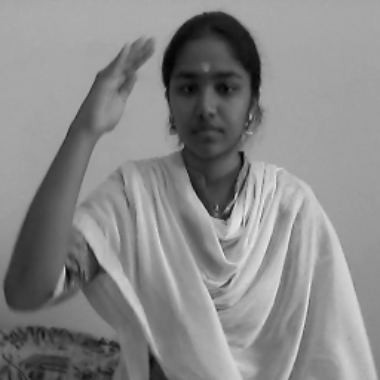

In [ ]:
DESIRED_HEIGHT = 380
DESIRED_WIDTH = 380
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Signed_mpipe/inf00170.png')
resize_and_show(image)

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
print(image)

[[[167 167 167]
  [165 165 165]
  [165 165 165]
  ...
  [164 164 164]
  [166 166 166]
  [164 164 164]]

 [[167 167 167]
  [165 165 165]
  [165 165 165]
  ...
  [164 164 164]
  [166 166 166]
  [164 164 164]]

 [[166 166 166]
  [165 165 165]
  [166 166 166]
  ...
  [165 165 165]
  [166 166 166]
  [164 164 164]]

 ...

 [[ 72  72  72]
  [ 74  74  74]
  [ 79  79  79]
  ...
  [180 180 180]
  [142 142 142]
  [128 128 128]]

 [[ 70  70  70]
  [ 74  74  74]
  [ 81  81  81]
  ...
  [179 179 179]
  [152 152 152]
  [128 128 128]]

 [[ 59  59  59]
  [ 69  69  69]
  [ 85  85  85]
  ...
  [182 182 182]
  [158 158 158]
  [129 129 129]]]


In [ ]:
DESIRED_HEIGHT = 380
DESIRED_WIDTH = 380
def resize(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  return image

Left wrist coordinates: (234.03668212890625, 318.0337219238281)
Right wrist coordinates: (61.42565155029297, 90.74559020996094)


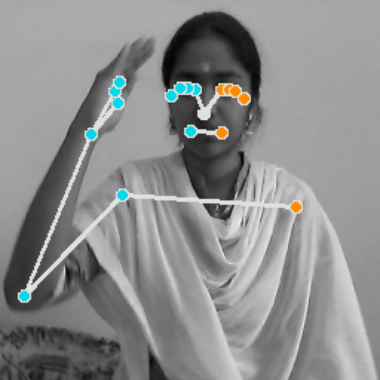

In [ ]:
#Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    image_hight, image_width, _ = image.shape
    
    print(
      f'Left wrist coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight})'
    )

    print(
      f'Right wrist coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_hight})'
    )

    # Draw pose landmarks.
    #print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
resize_and_show(annotated_image)

In [ ]:
import os
p1 = '/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Signed_mpipe'
lx = []
ly = []
rx = []
ry = []


with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for i in (os.listdir(p1)):
    image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Signed_mpipe/{}'.format(i))
    image = resize(image)
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    image_hight, image_width, _ = image.shape
    lx.append(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width)
    ly.append(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight)
    
    rx.append(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * image_width)
    ry.append(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_hight)


In [ ]:
import os
p1 = '/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Signed_mpipe'
signed = 0
unsigned = 0

with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for i in (os.listdir(p1)):
    image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Updated DL Project/Signed_mpipe/{}'.format(i))
    image = resize(image)
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    image_hight, image_width, _ = image.shape
    if (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight >= 300 or results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_hight >=70):
      signed += 1
    
    else:

      unsigned += 1


In [ ]:
import numpy as np
print(np.mean(lx),
np.mean(ly),
np.mean(rx),
np.mean(ry))


224.66253497553808 315.88590345195695 58.717109156589885 83.8110933490828


In [ ]:
print("Signed:",signed,"Unsigned:", unsigned)


Signed: 102 Unsigned: 0
